# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns


In [27]:
df = pd.read_csv('demo01.csv')


In [16]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,NaN,NaN
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,NaN,NaN
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,NaN,NaN
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,NaN,NaN
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [18]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE         float64
STATUS                  object
dtype: object

In [29]:
df.drop_duplicates()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [30]:
df.shape

(16650, 16)

In [31]:
df = df.drop_duplicates()
df.shape

(6770, 16)

In [22]:
df.isna().sum()

ID                           0
CODE_GENDER            1048575
FLAG_OWN_CAR           1048575
FLAG_OWN_REALTY        1048575
CNT_CHILDREN           1048575
AMT_INCOME_TOTAL       1048575
NAME_INCOME_TYPE       1048575
NAME_EDUCATION_TYPE    1048575
NAME_FAMILY_STATUS     1048575
NAME_HOUSING_TYPE      1048575
DAYS_BIRTH             1048575
DAYS_EMPLOYED          1048575
FLAG_MOBIL             1048575
FLAG_WORK_PHONE        1048575
FLAG_PHONE             1048575
FLAG_EMAIL             1048575
OCCUPATION_TYPE        1182778
CNT_FAM_MEMBERS        1048575
MONTHS_BALANCE          438557
STATUS                  438557
dtype: int64

In [32]:
count_values = df['mau'].value_counts(normalize=True)

In [34]:
import matplotlib.pyplot as plt

C:\Users\Jaime\AppData\Local\Temp\ipykernel_6920\4284971348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mau', data=df, palette='pastel')


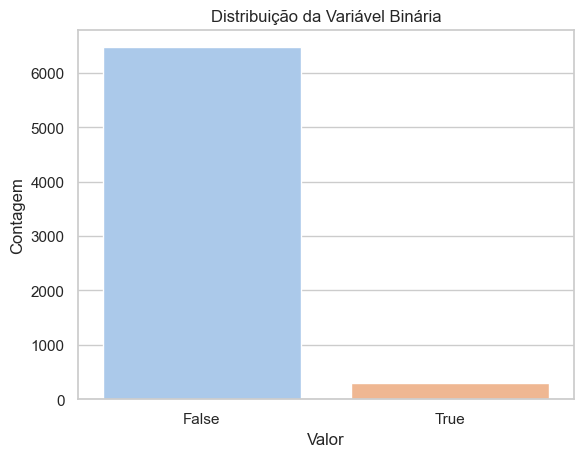

In [35]:
sns.set(style="whitegrid")

# Plotar gráfico de barras da distribuição da variável binária
sns.countplot(x='mau', data=df, palette='pastel')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição da Variável Binária')
plt.xlabel('Valor')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

2.1

In [36]:
colunas = df.columns
tipos = df.dtypes

In [38]:
df_info = pd.DataFrame({'Coluna': colunas, 'Tipo': tipos})
df_info

,Coluna,Tipo
sexo,sexo,object
posse_de_veiculo,posse_de_veiculo,object
posse_de_imovel,posse_de_imovel,object
qtd_filhos,qtd_filhos,int64
tipo_renda,tipo_renda,object
educacao,educacao,object
estado_civil,estado_civil,object
tipo_residencia,tipo_residencia,object
idade,idade,float64
tempo_emprego,tempo_emprego,float64


2.2

In [52]:
quantidade_valores_unicos = df.nunique()
quantidade_valores = list(quantidade_valores_unicos.values)
df_info['qtd_valores'] = quantidade_valores

In [53]:
df_info

,Coluna,Tipo,qtd_valores
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,8
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,5298
tempo_emprego,tempo_emprego,float64,3005


In [56]:
df_info = df_info.rename(columns={'qtd_valores': 'qtd_categorias'})
df_info

,Coluna,Tipo,qtd_categorias
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,8
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,5298
tempo_emprego,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

#### 5) Salve a base, pois ela será utilizada no final deste módulo.